<a href="https://colab.research.google.com/github/vzeizer/PySpark_Ethereum/blob/master/PySpark_Ethereum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Python's Version
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.11.11


In [ ]:
# Google Colab's Linux Version
!cat /etc/*release

DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=22.04
DISTRIB_CODENAME=jammy
DISTRIB_DESCRIPTION="Ubuntu 22.04.3 LTS"
PRETTY_NAME="Ubuntu 22.04.3 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.3 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


In [ ]:
# Java's version
!java -version

openjdk version "11.0.25" 2024-10-15
OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)


In [ ]:
# Downloading Spark's binaries
!wget -q https://archive.apache.org/dist/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz

In [ ]:
# Unzipping the file
!tar xf spark-3.4.1-bin-hadoop3.tgz

In [ ]:
# It lists local folders
!ls

ETH-USD.csv  sample_data	      spark-3.4.1-bin-hadoop3.tgz
modelos      spark-3.4.1-bin-hadoop3  spark-3.4.1-bin-hadoop3.tgz.1


In [ ]:
# It lists the contents of the local folders
!ls /content

ETH-USD.csv  sample_data	      spark-3.4.1-bin-hadoop3.tgz
modelos      spark-3.4.1-bin-hadoop3  spark-3.4.1-bin-hadoop3.tgz.1


In [ ]:
# It defines the SPARK_HOME environment variable
import os
os.environ["SPARK_HOME"] = "/content/spark-3.4.1-bin-hadoop3"

In [ ]:
# It installs findspark
!pip install -q findspark

In [ ]:
# Imports
import findspark
# Outputs Formats
import pandas as pd
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 400)
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
# It imports the packages and creates a Spark's session
findspark.init()
from pyspark.sql import SparkSession
spark_session = SparkSession.builder.master("local[*]").getOrCreate()
# Property used to better format the output tabels
spark_session.conf.set("spark.sql.repl.eagerEval.enabled", True)
spark_session

# for numerical computations
import pandas as pd
import numpy as np
# for visualizations
import seaborn as sns
from matplotlib import pyplot as plt

# PySpark-related packages
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import StringIndexer
from pyspark.ml.regression import LinearRegression
from pyspark.mllib.evaluation import RegressionMetrics
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import StringIndexer
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, CrossValidatorModel
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col, sum
from pyspark.sql.window import Window
from pyspark.sql import functions as F
from pyspark.sql.functions import monotonically_increasing_id


In [ ]:
# The days in advance to predict the Ethereum's price.
DAYS_ADVANCE = 7

In [ ]:
# opening the data
df_eth = spark_session.read.csv('ETH-USD.csv', header = True, sep = ",",inferSchema=True)

In [ ]:
# showing first five rows
df_eth.show(5)

+----------+----------+----------+----------+----------+----------+----------+
|      Date|      Open|      High|       Low|     Close| Adj Close|    Volume|
+----------+----------+----------+----------+----------+----------+----------+
|2017-11-09|308.644989|329.451996|   307.056|320.884003|320.884003| 893249984|
|2017-11-10| 320.67099|324.717987|294.541992|299.252991|299.252991| 885985984|
|2017-11-11|298.585999|319.453003|298.191986|   314.681|   314.681| 842300992|
|2017-11-12|314.690002|319.153015|   298.513| 307.90799| 307.90799|1613479936|
|2017-11-13|307.024994|328.415009|307.024994|316.716003|316.716003|1041889984|
+----------+----------+----------+----------+----------+----------+----------+
only showing top 5 rows



In [ ]:
# types of the columns
df_eth.dtypes

[('Date', 'date'),
 ('Open', 'double'),
 ('High', 'double'),
 ('Low', 'double'),
 ('Close', 'double'),
 ('Adj Close', 'double'),
 ('Volume', 'bigint')]

In [ ]:
# Printing the Schema of the dataframes
df_eth.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: long (nullable = true)



In [ ]:
# It creates a Temporary Table from the DataFrame
# Temporary Tables are useful when you wish that the results' test be visible
# for all others Spark's sessions
df_eth.createOrReplaceTempView('dados_ethereum')

In [ ]:
# taking a looking at the RDD
df_eth

Date,Open,High,Low,Close,Adj Close,Volume
2017-11-09,308.644989,329.451996,307.056,320.884003,320.884003,893249984
2017-11-10,320.67099,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681,314.681,842300992
2017-11-12,314.690002,319.153015,298.513,307.90799,307.90799,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
2017-11-14,316.763,340.177002,316.763,337.631012,337.631012,1069680000
2017-11-15,337.963989,340.911987,329.812988,333.356995,333.356995,722665984
2017-11-16,333.442993,336.158997,323.605988,330.924011,330.924011,797254016
2017-11-17,330.166992,334.963989,327.52301,332.394012,332.394012,621732992
2017-11-18,331.980011,349.615997,327.687012,347.612,347.612,649638976


In [ ]:
# Get the number of rows
num_rows = df_eth.count()
print(f"Number of Rows: {num_rows}")

# Get the number of columns
num_columns = len(df_eth.columns)
print(f"Number of Columns: {num_columns}")

Number of Rows: 2289
Number of Columns: 7


In [ ]:
# Check for null values in each column
null_counts = df_eth.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_eth.columns])

# Display the results
null_counts.show()

+----+----+----+---+-----+---------+------+
|Date|Open|High|Low|Close|Adj Close|Volume|
+----+----+----+---+-----+---------+------+
|   0|   0|   0|  0|    0|        0|     0|
+----+----+----+---+-----+---------+------+



In [ ]:
df_eth.show()

+----------+----------+----------+----------+----------+----------+----------+
|      Date|      Open|      High|       Low|     Close| Adj Close|    Volume|
+----------+----------+----------+----------+----------+----------+----------+
|2017-11-09|308.644989|329.451996|   307.056|320.884003|320.884003| 893249984|
|2017-11-10| 320.67099|324.717987|294.541992|299.252991|299.252991| 885985984|
|2017-11-11|298.585999|319.453003|298.191986|   314.681|   314.681| 842300992|
|2017-11-12|314.690002|319.153015|   298.513| 307.90799| 307.90799|1613479936|
|2017-11-13|307.024994|328.415009|307.024994|316.716003|316.716003|1041889984|
|2017-11-14|   316.763|340.177002|   316.763|337.631012|337.631012|1069680000|
|2017-11-15|337.963989|340.911987|329.812988|333.356995|333.356995| 722665984|
|2017-11-16|333.442993|336.158997|323.605988|330.924011|330.924011| 797254016|
|2017-11-17|330.166992|334.963989| 327.52301|332.394012|332.394012| 621732992|
|2017-11-18|331.980011|349.615997|327.687012|   347.

In [ ]:
# Let us get the day of the week
df_eth = df_eth.withColumn('day_of_week', dayofweek(df_eth.Date))

In [ ]:
# Let us get the year
df_eth = df_eth.withColumn("year", split(col("date"),"-").getItem(0))

In [ ]:
# taking a look at the RDD
df_eth.show()

+----------+----------+----------+----------+----------+----------+----------+-----------+----+
|      Date|      Open|      High|       Low|     Close| Adj Close|    Volume|day_of_week|year|
+----------+----------+----------+----------+----------+----------+----------+-----------+----+
|2017-11-09|308.644989|329.451996|   307.056|320.884003|320.884003| 893249984|          5|2017|
|2017-11-10| 320.67099|324.717987|294.541992|299.252991|299.252991| 885985984|          6|2017|
|2017-11-11|298.585999|319.453003|298.191986|   314.681|   314.681| 842300992|          7|2017|
|2017-11-12|314.690002|319.153015|   298.513| 307.90799| 307.90799|1613479936|          1|2017|
|2017-11-13|307.024994|328.415009|307.024994|316.716003|316.716003|1041889984|          2|2017|
|2017-11-14|   316.763|340.177002|   316.763|337.631012|337.631012|1069680000|          3|2017|
|2017-11-15|337.963989|340.911987|329.812988|333.356995|333.356995| 722665984|          4|2017|
|2017-11-16|333.442993|336.158997|323.60

In [ ]:
# Let us get the month
df_eth = df_eth.withColumn("month", split(col("date"),"-").getItem(1))

In [ ]:
# Let us get the day
df_eth = df_eth.withColumn("day", split(col("date"),"-").getItem(2))

In [ ]:
# taking a look at the RDD
df_eth.show()

+----------+----------+----------+----------+----------+----------+----------+-----------+----+-----+---+
|      Date|      Open|      High|       Low|     Close| Adj Close|    Volume|day_of_week|year|month|day|
+----------+----------+----------+----------+----------+----------+----------+-----------+----+-----+---+
|2017-11-09|308.644989|329.451996|   307.056|320.884003|320.884003| 893249984|          5|2017|   11| 09|
|2017-11-10| 320.67099|324.717987|294.541992|299.252991|299.252991| 885985984|          6|2017|   11| 10|
|2017-11-11|298.585999|319.453003|298.191986|   314.681|   314.681| 842300992|          7|2017|   11| 11|
|2017-11-12|314.690002|319.153015|   298.513| 307.90799| 307.90799|1613479936|          1|2017|   11| 12|
|2017-11-13|307.024994|328.415009|307.024994|316.716003|316.716003|1041889984|          2|2017|   11| 13|
|2017-11-14|   316.763|340.177002|   316.763|337.631012|337.631012|1069680000|          3|2017|   11| 14|
|2017-11-15|337.963989|340.911987|329.812988|3

In [ ]:
# It converts the dataframe from Spark to Pandas.
# The reason is to ease the exploratory data analysis.
df_pandas = df_eth.toPandas()

In [ ]:
# taking a look at the dataframe
df_pandas.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,day_of_week,year,month,day
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984,5,2017,11,09
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984,6,2017,11,10
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992,7,2017,11,11
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936,1,2017,11,12
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984,2,2017,11,13


In [ ]:
# Getting individual values in order to use them in the Plots
volume_ETH = df_pandas["Volume"].values.tolist()
day_of_week = df_pandas["day_of_week"].values.tolist()
year = df_pandas["year"].values.tolist()
month = df_pandas["month"].values.tolist()
day = df_pandas["day"].values.tolist()

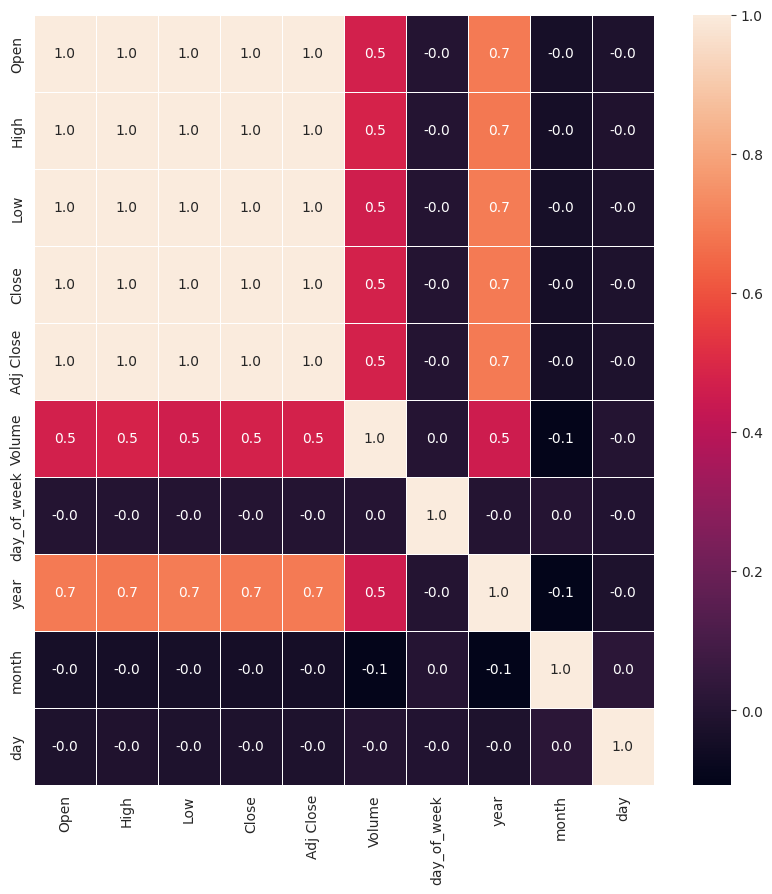

In [ ]:
# Heatmap in order to visualize correlations. Spearman's method will be used.
corr = df_pandas.drop(columns=['Date']).corr(method='spearman')
f,ax = plt.subplots(figsize = (10, 10))

sns.heatmap(corr, annot = True, linewidths = .5, fmt = '.1f', ax = ax)

plt.show()

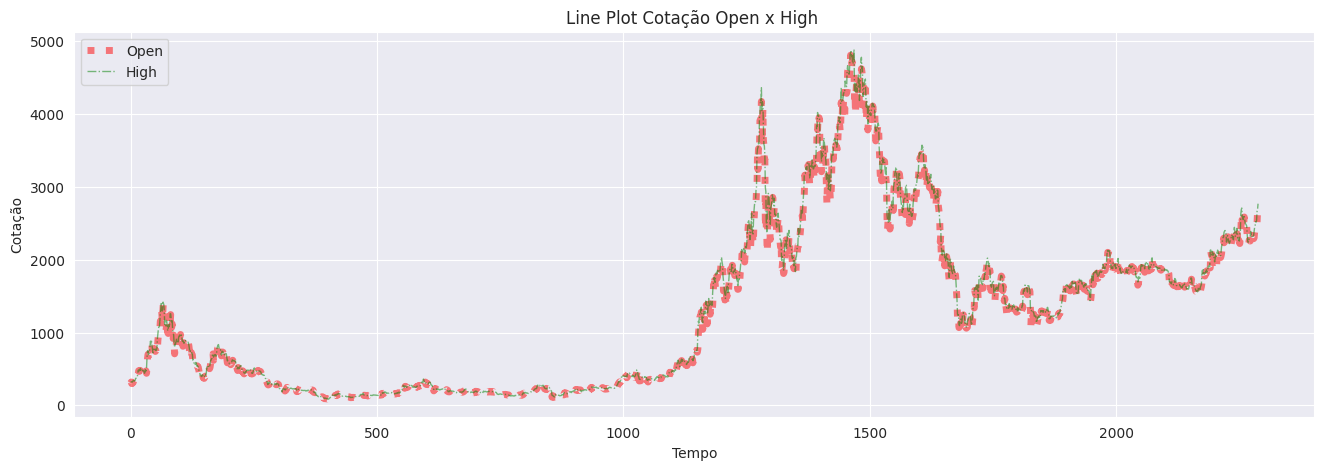

In [ ]:
# Line Plot Quotation Open x High

plt.figure(figsize = (16,5))

df_pandas.Open.plot(kind = 'line',
                    color = 'r',
                    label = 'Open',
                    alpha = 0.5,
                    linewidth = 5,
                    grid = True,
                    linestyle = ':')

df_pandas.High.plot(color = 'g',
                    label = 'High',
                    linewidth = 1,
                    alpha = 0.5,
                    grid = True,
                    linestyle = '-.')

plt.legend(loc = 'upper left')
plt.xlabel('Tempo')
plt.ylabel('Cotação')
plt.title('Line Plot Cotação Open x High ')

plt.show()

<Axes: ylabel='Frequency'>

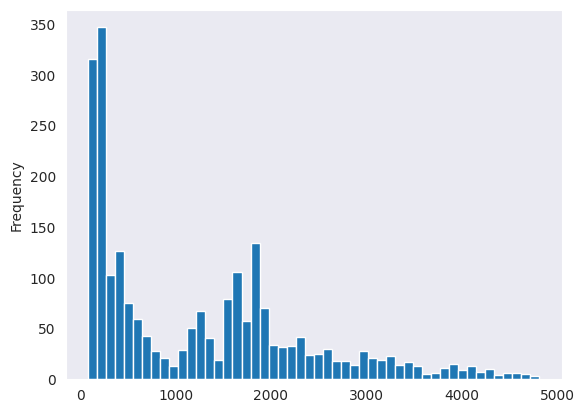

In [ ]:
# Histogram of the Open Quotation
df_pandas.Open.plot(kind = 'hist', bins = 50)

<Axes: ylabel='Frequency'>

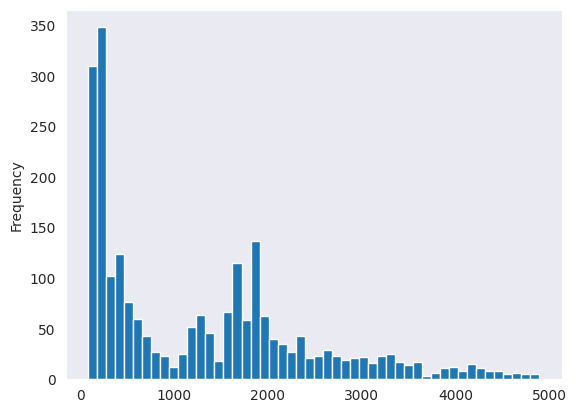

In [ ]:
# Histogram of the Highest Quotation
df_pandas.High.plot(kind = 'hist', bins = 50)

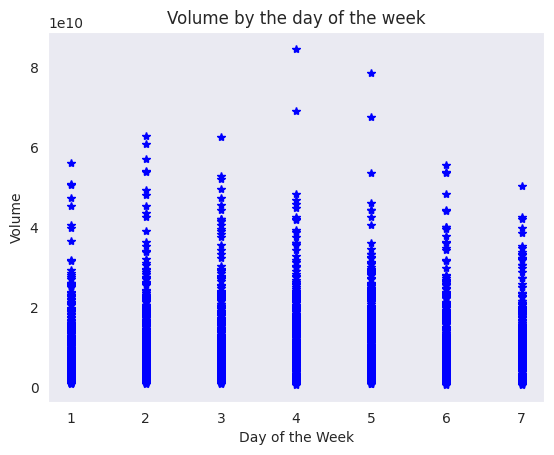

In [ ]:
# Volume's Plot by the week day
plt.plot(day_of_week, volume_ETH, 'b*')
plt.xlabel('Day of the Week')
plt.ylabel('Volume')
plt.title('Volume by the day of the week')
plt.show()

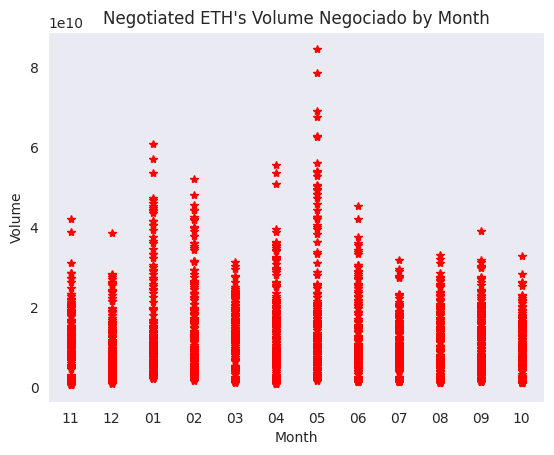

In [ ]:
# Plot of the ETH's Volume per Month
plt.plot(month, volume_ETH, 'r*')
plt.xlabel('Month')
plt.ylabel('Volume')
plt.title("Negotiated ETH's Volume Negociado by Month")
plt.show()

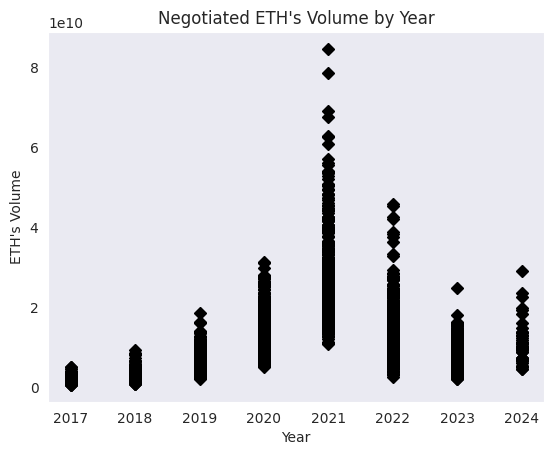

In [ ]:
# Plot of ETH's Volume by Year
plt.plot(year, volume_ETH , 'kD')
plt.xlabel('Year')
plt.ylabel("ETH's Volume")
plt.title("Negotiated ETH's Volume by Year")
plt.show()

### Partial Auto-Correlation Functions Plots (PACF).

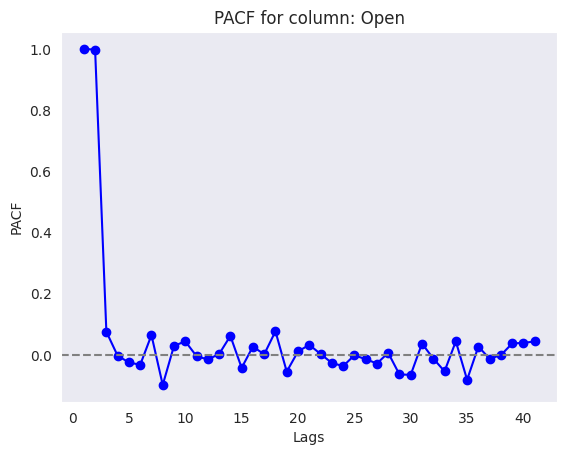

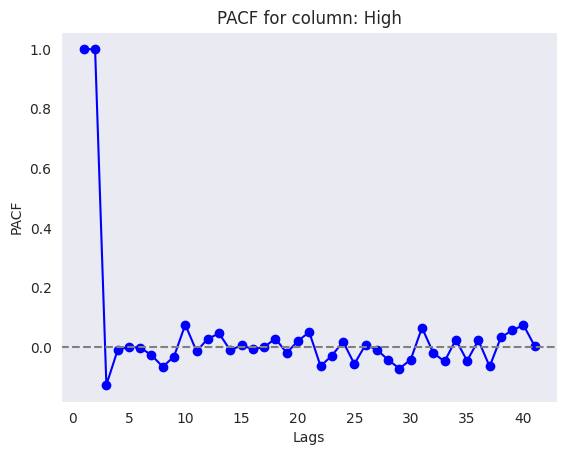

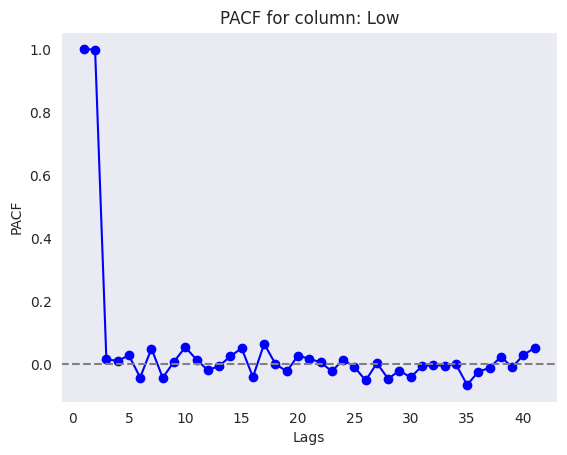

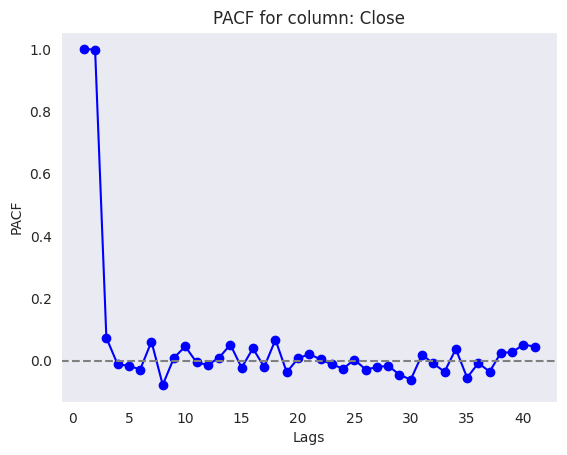

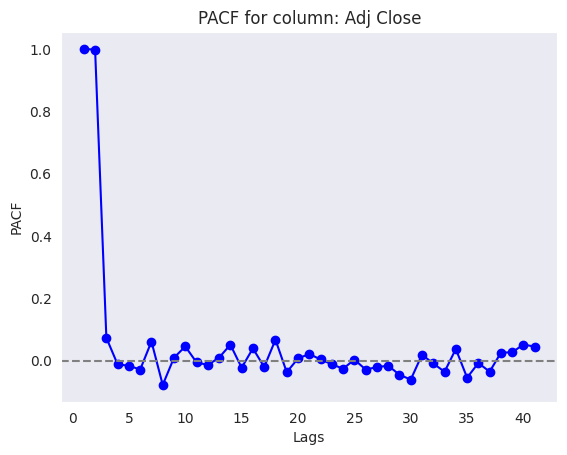

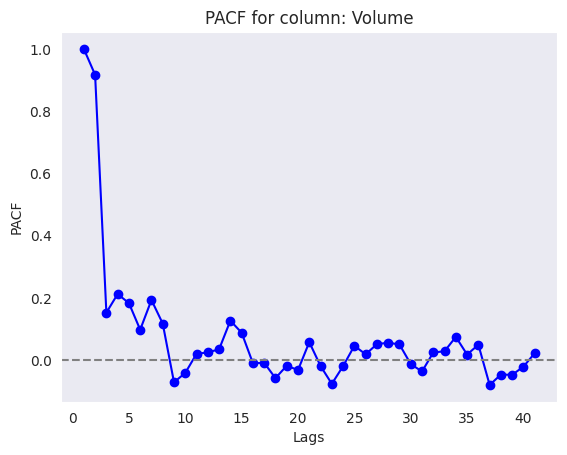

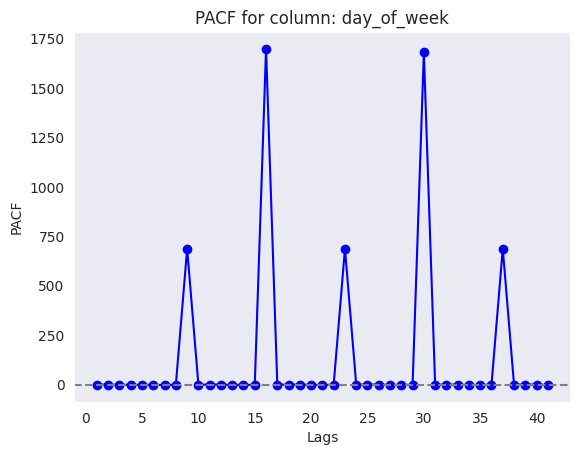

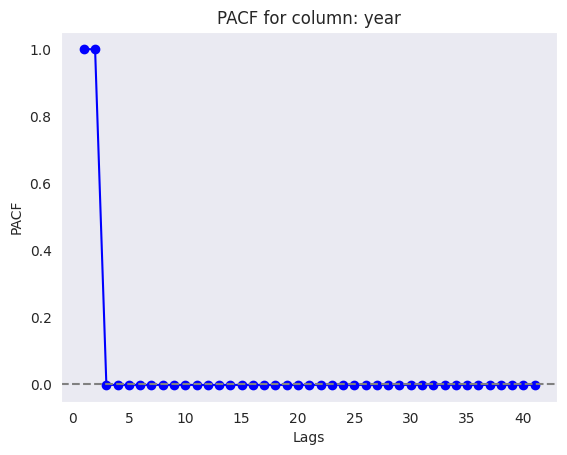

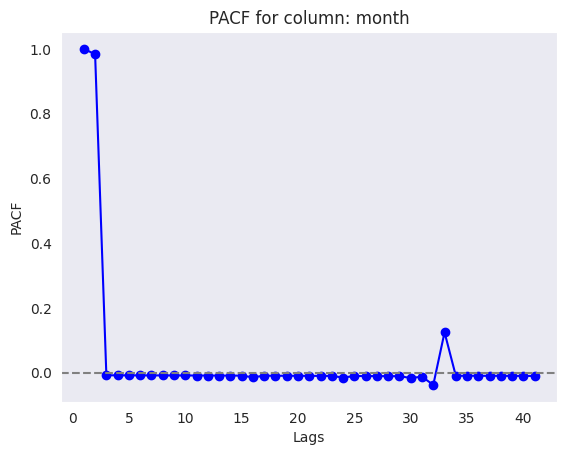

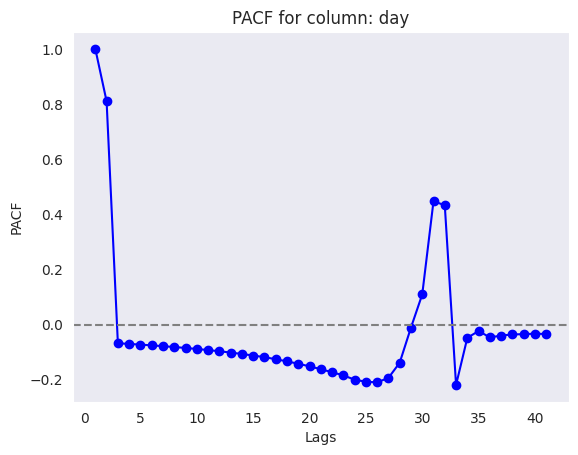

In [ ]:
from statsmodels.tsa.stattools import pacf

def plot_pacf_for_all_columns(df):
  """Plots PACF for all columns in a pandas DataFrame.

  Args:
    df: A pandas DataFrame.
  """
  for col in df.columns:
    # Calculate PACF values
    pacf_values = pacf(df[col], nlags=40)

    # Create the plot
    fig, ax = plt.subplots()
    ax.plot(range(1, len(pacf_values) + 1), pacf_values, marker='o', linestyle='-', color='blue')
    ax.axhline(y=0, color='gray', linestyle='--')
    ax.set_xlabel("Lags")
    ax.set_ylabel("PACF")
    ax.set_title(f"PACF for column: {col}")
    plt.show()

# Example usage:
plot_pacf_for_all_columns(df_pandas.drop(columns='Date'))

### Feature Engineering with PySpark

In [ ]:
# Printing the Schema
df_eth.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: long (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day: string (nullable = true)



#### Fixing Wrong Data Types

In [ ]:
# Transform string column to integer using withColumn() and cast()
df_eth = df_eth.withColumn("year", df_eth["year"].cast("integer"))
df_eth = df_eth.withColumn("month", df_eth["month"].cast("integer"))
df_eth = df_eth.withColumn("day", df_eth["day"].cast("integer"))



In [ ]:
# Checking the Schema
df_eth.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: long (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)



In [ ]:
# Selecting df_eth columns, except the 'Date'
list_eth_columns = list(df_eth.columns)
list_eth_columns = [col for col in list_eth_columns if col!='Date']

In [ ]:
# number of days to lag

cols_to_shift = ['High','Open','Low','Close','Adj Close','Volume']
cols_to_delete = ['Open','Low','Close','Adj Close','Volume']

#for col in list_eth_columns:
for col in cols_to_shift:
  # Assuming 'df' is your DataFrame with a column 'your_column_to_shift'
  # Replace this with your actual DataFrame or load your data

  # Define the window specification
  windowSpec = Window().orderBy("Date")  # Replace 'your_order_column' with the column used for ordering

  # Shift the column by 7 rows
  # the minus sign in the lag_shift is because of the shift for the previous week
  df_eth = df_eth.withColumn(rf"{col}_shift", F.lag(rf"{col}", DAYS_ADVANCE).over(windowSpec))

# dropping High
df_eth = df_eth.drop(*cols_to_delete)
# Show the result
df_eth.show()

+----------+----------+-----------+----+-----+---+----------+----------+----------+-----------+---------------+------------+
|      Date|      High|day_of_week|year|month|day|High_shift|Open_shift| Low_shift|Close_shift|Adj Close_shift|Volume_shift|
+----------+----------+-----------+----+-----+---+----------+----------+----------+-----------+---------------+------------+
|2017-11-09|329.451996|          5|2017|   11|  9|      null|      null|      null|       null|           null|        null|
|2017-11-10|324.717987|          6|2017|   11| 10|      null|      null|      null|       null|           null|        null|
|2017-11-11|319.453003|          7|2017|   11| 11|      null|      null|      null|       null|           null|        null|
|2017-11-12|319.153015|          1|2017|   11| 12|      null|      null|      null|       null|           null|        null|
|2017-11-13|328.415009|          2|2017|   11| 13|      null|      null|      null|       null|           null|        null|


In [ ]:
# Drop rows with NaN values
df_eth = df_eth.na.drop()

# Show the result
df_eth.show()

+----------+----------+-----------+----+-----+---+----------+----------+----------+-----------+---------------+------------+
|      Date|      High|day_of_week|year|month|day|High_shift|Open_shift| Low_shift|Close_shift|Adj Close_shift|Volume_shift|
+----------+----------+-----------+----+-----+---+----------+----------+----------+-----------+---------------+------------+
|2017-11-16|336.158997|          5|2017|   11| 16|329.451996|308.644989|   307.056| 320.884003|     320.884003|   893249984|
|2017-11-17|334.963989|          6|2017|   11| 17|324.717987| 320.67099|294.541992| 299.252991|     299.252991|   885985984|
|2017-11-18|349.615997|          7|2017|   11| 18|319.453003|298.585999|298.191986|    314.681|        314.681|   842300992|
|2017-11-19|371.290985|          1|2017|   11| 19|319.153015|314.690002|   298.513|  307.90799|      307.90799|  1613479936|
|2017-11-20|372.136993|          2|2017|   11| 20|328.415009|307.024994|307.024994| 316.716003|     316.716003|  1041889984|


In [ ]:
#columns_to_drop = ["Open","Low","Close","Adj Close","Volume"]
#df_eth = df_eth.drop(*columns_to_drop)

In [ ]:
# It prepares the Feature's Vector
assembler = VectorAssembler(inputCols = ['Open_shift','Volume_shift','Low_shift','Adj Close_shift','Close_shift','High_shift',
                                         'day_of_week','day','month','year'],
                            outputCol = "features")

In [ ]:
# It creates the DataFrame's Feature's Vector
df_assembled = assembler.transform(df_eth)

In [ ]:
# Visualizing the data
df_assembled.show(10, truncate = False)

+----------+----------+-----------+----+-----+---+----------+----------+----------+-----------+---------------+------------+-------------------------------------------------------------------------------------------+
|Date      |High      |day_of_week|year|month|day|High_shift|Open_shift|Low_shift |Close_shift|Adj Close_shift|Volume_shift|features                                                                                   |
+----------+----------+-----------+----+-----+---+----------+----------+----------+-----------+---------------+------------+-------------------------------------------------------------------------------------------+
|2017-11-16|336.158997|5          |2017|11   |16 |329.451996|308.644989|307.056   |320.884003 |320.884003     |893249984   |[308.644989,8.93249984E8,307.056,320.884003,320.884003,329.451996,5.0,16.0,11.0,2017.0]    |
|2017-11-17|334.963989|6          |2017|11   |17 |324.717987|320.67099 |294.541992|299.252991 |299.252991     |885985984   |[320.670

In [ ]:
# Calculate the split point based on the desired test size
test_size = 0.3  # Adjust test size (0-1)
split_point = int(df_assembled.count() * (1 - test_size))

features = 'features'
target = 'High'

# Calculate a unique, monotonically increasing ID for each row
# This preserves the temporal order
df_assembled = df_assembled.withColumn("row_id", monotonically_increasing_id())

# Split the data without shuffling
dados_treino = df_assembled.filter(df_assembled.row_id < split_point).select(features,target)
dados_teste = df_assembled.filter(df_assembled.row_id >= split_point).select(features,target)


In [ ]:
# visualizing df_assembled
df_assembled

Date,High,day_of_week,year,month,day,High_shift,Open_shift,Low_shift,Close_shift,Adj Close_shift,Volume_shift,features,row_id
2017-11-16,336.158997,5,2017,11,16,329.451996,308.644989,307.056,320.884003,320.884003,893249984,"[308.644989,8.932...",0
2017-11-17,334.963989,6,2017,11,17,324.717987,320.67099,294.541992,299.252991,299.252991,885985984,"[320.67099,8.8598...",1
2017-11-18,349.615997,7,2017,11,18,319.453003,298.585999,298.191986,314.681,314.681,842300992,"[298.585999,8.423...",2
2017-11-19,371.290985,1,2017,11,19,319.153015,314.690002,298.513,307.90799,307.90799,1613479936,"[314.690002,1.613...",3
2017-11-20,372.136993,2,2017,11,20,328.415009,307.024994,307.024994,316.716003,316.716003,1041889984,"[307.024994,1.041...",4
2017-11-21,372.470001,3,2017,11,21,340.177002,316.763,316.763,337.631012,337.631012,1069680000,"[316.763,1.06968E...",5
2017-11-22,381.420013,4,2017,11,22,340.911987,337.963989,329.812988,333.356995,333.356995,722665984,"[337.963989,7.226...",6
2017-11-23,425.548004,5,2017,11,23,336.158997,333.442993,323.605988,330.924011,330.924011,797254016,"[333.442993,7.972...",7
2017-11-24,480.972992,6,2017,11,24,334.963989,330.166992,327.52301,332.394012,332.394012,621732992,"[330.166992,6.217...",8
2017-11-25,485.191986,7,2017,11,25,349.615997,331.980011,327.687012,347.612,347.612,649638976,"[331.980011,6.496...",9


In [ ]:
type(dados_treino)

pyspark.sql.dataframe.DataFrame

In [ ]:
# It creates the Scaler
scaler = MinMaxScaler(inputCol = "features", outputCol = "scaled_features")

In [ ]:
# It fits the training data
scalerModel = scaler.fit(dados_treino)

In [ ]:
# It fits and transforms the training data
dados_treino_scaled = scalerModel.transform(dados_treino)
# It transforms the testing data
dados_teste_scaled = scalerModel.transform(dados_teste)

In [ ]:
# taking a look at the scaled dataframe
dados_treino_scaled.select("features", "scaled_features").show(10, truncate = False)

+-------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                   |scaled_features                                                                                                                                                                              |
+-------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[308.644989,8.93249984E8,307.056,320.884003,320.884003,329.451996,5.0,16.0,11.0,2017.0]    |[0.0474767645778929,0.0032376958289800158,0.04837454028

In [ ]:
# visualizing columns
dados_treino_scaled.columns

['features', 'High', 'scaled_features']

### Machine Learning

In [ ]:
# Creating a Regression Mode
modelo_lr_v1 = (LinearRegression(featuresCol = 'scaled_features',
                                 labelCol = "High",
                                 predictionCol = 'Predicted_price',
                                 maxIter = 100,
                                 regParam = 0.3,
                                 elasticNetParam = 0.8,
                                 standardization = False))

In [ ]:
# Training Model
modelo_v1 = modelo_lr_v1.fit(dados_treino_scaled)

In [ ]:
# Saving the model
modelo_v1.write().overwrite().save("modelos/modelo_v1")

In [ ]:
# Predictions with test data
previsoes_v1 = modelo_v1.transform(dados_teste_scaled)

In [ ]:
# visualzing predictions
previsoes_v1.show()

+--------------------+-----------+--------------------+------------------+
|            features|       High|     scaled_features|   Predicted_price|
+--------------------+-----------+--------------------+------------------+
|[3108.448975,1.70...|3467.555908|[0.63992861729231...|3258.8076273343886|
|[3106.405273,8.87...|3521.284668|[0.63949616021948...| 3259.358760328104|
|[3143.795654,1.34...|3573.960205|[0.64740814284680...|3395.4415175255513|
|[3292.32251,2.062...|3535.148193|[0.67883713268147...|3483.4833340038326|
|[3335.02124,1.953...|3546.706787|[0.68787238722912...| 3539.399473914194|
|[3401.526123,1.53...|3411.672119|[0.70194513708766...| 3513.578476022479|
|[3385.289307,1.76...|3263.474609|[0.69850934952200...| 3433.257304783969|
|[3282.576172,2.09...|3301.607422|[0.67677476116041...| 3545.948699205195|
|[3449.788574,2.35...|3261.963135|[0.71215770148662...| 3590.019851564075|
|[3444.810547,1.53...|3303.003174|[0.71110432727408...|3629.6128057145283|
|[3522.36499,1.820...|321

In [ ]:
# Selecting the respective columns
pred_data_v1 = previsoes_v1.select("Predicted_price", "High").show(10)

+------------------+-----------+
|   Predicted_price|       High|
+------------------+-----------+
|3258.8076273343886|3467.555908|
| 3259.358760328104|3521.284668|
|3395.4415175255513|3573.960205|
|3483.4833340038326|3535.148193|
| 3539.399473914194|3546.706787|
| 3513.578476022479|3411.672119|
| 3433.257304783969|3263.474609|
| 3545.948699205195|3301.607422|
| 3590.019851564075|3261.963135|
|3629.6128057145283|3303.003174|
+------------------+-----------+
only showing top 10 rows



In [ ]:
# Mean Absolute Error
print("Mean Absolute Error (MAE) in the test data is: {0}".format(modelo_v1.summary.meanAbsoluteError))

Mean Absolute Error (MAE) in the test data is: 111.01502016826626


In [ ]:
# It creates an Evaluator for the Regression's Model
evaluator = RegressionEvaluator(labelCol = "High",
                                predictionCol = "Predicted_price",
                                metricName = "rmse")

In [ ]:
# Applying the Evaluator
rmse_v1 = evaluator.evaluate(previsoes_v1)
print("Root Mean Squared Error (RMSE) in the test data is = %g" % rmse_v1)

Root Mean Squared Error (RMSE) in the test data is = 167.775


In [ ]:
# Calculating the R2 coefficient
evaluator = RegressionEvaluator(labelCol = "High",
                                predictionCol = "Predicted_price",
                                metricName = "r2")

# Aplica o avaliador
r2_v1 = evaluator.evaluate(previsoes_v1)
print("R2 in the test data = %g" % r2_v1)

R2 in the test data = 0.867477


In [ ]:
# Getting the Predictions
pred_results_v1 = modelo_v1.evaluate(dados_teste_scaled)
# True Values converted to Pandas
Y = pred_results_v1.predictions.select('High').toPandas()
# Predicted Values converted to Pandas
_Y = pred_results_v1.predictions.select("Predicted_price").toPandas()

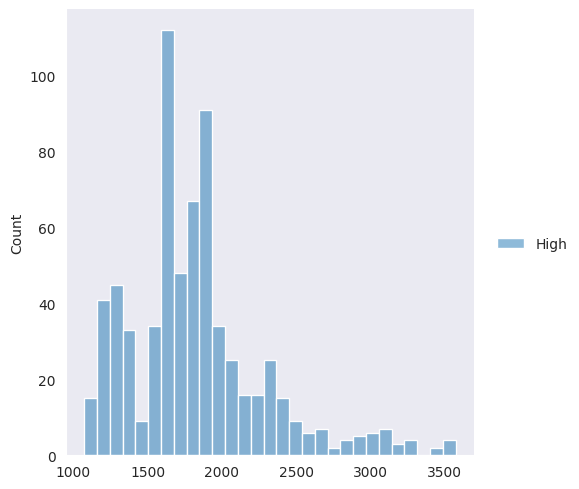

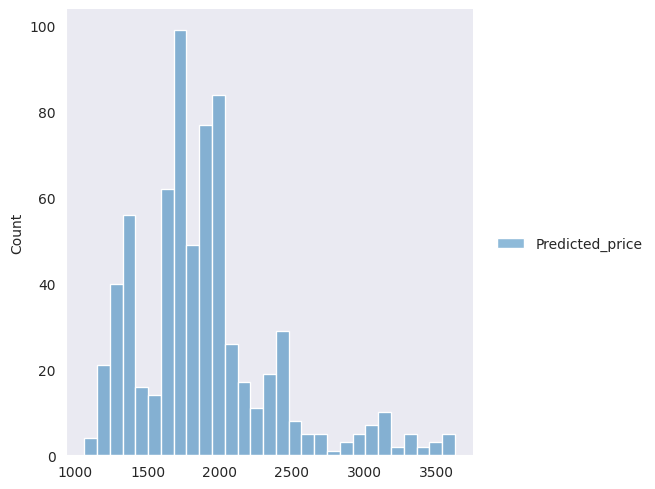

In [ ]:
# Distribution of True Values against Prediceted Values
sns.set_style("dark")
ax1 = sns.displot(Y, color = "r", label = "True Values")
sns.displot(_Y, color = "b", label = "Predicted Values")

plt.show()

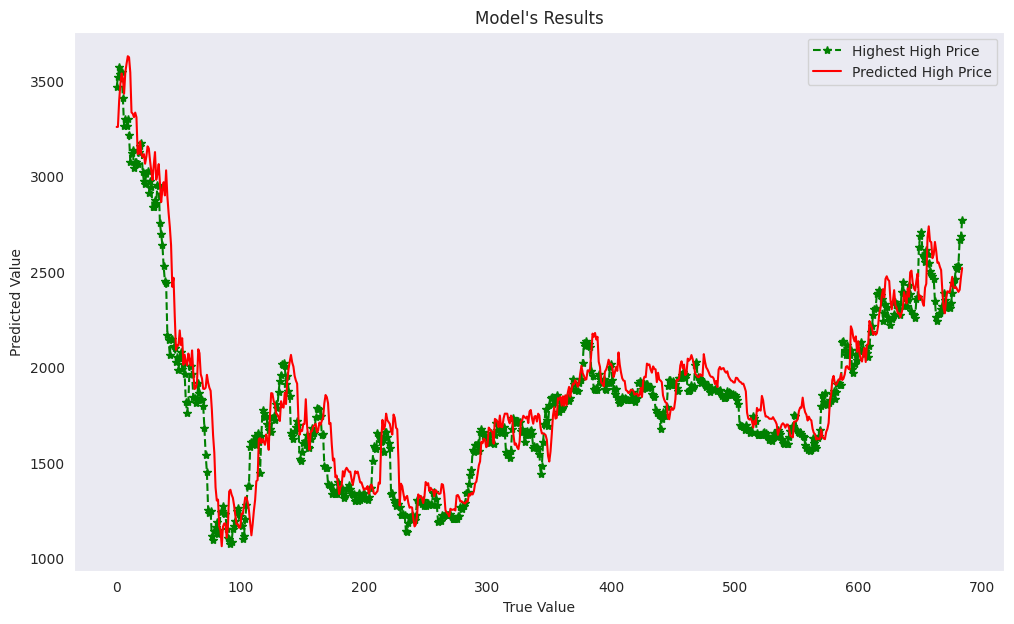

In [ ]:
# Plotting True Values against Predicted Values
plt.figure(figsize = (12,7))
plt.plot(Y, color = 'green', marker = '*', linestyle = 'dashed', label = 'Highest High Price')
plt.plot(_Y, color = 'red', label = 'Predicted High Price')
plt.title("Model's Results")
plt.xlabel('True Value')
plt.ylabel('Predicted Value')

plt.legend()

plt.show()

### Versão 2 do Modelo (Otimização de Hiperparâmetros)

In [ ]:
# It creates the second model's version
modelo_lr_v2 = (LinearRegression(featuresCol = 'scaled_features',
                                 labelCol = "High",
                                 predictionCol = 'Predicted_price'))

In [ ]:
# It createsone grid for hyperparameter optimization
grid = ParamGridBuilder().addGrid(modelo_lr_v2.maxIter, [50, 100]).build()

In [ ]:
# It creates and evaluator to be used in the CV
evaluator = RegressionEvaluator(labelCol = "High",
                                predictionCol = "Predicted_price",
                                metricName = "rmse")

In [ ]:
# Creating the CrossValidator
cv = CrossValidator(estimator = modelo_lr_v2, estimatorParamMaps = grid, evaluator = evaluator, parallelism = 2)

In [ ]:
# Training the CrossValidator over the grid
cvModel = cv.fit(dados_treino_scaled)

In [ ]:
# Getting the best model from the CrossValidator
modelo_v2 = cvModel.bestModel

In [ ]:
# Writing the model in Disc
modelo_v2.write().overwrite().save("modelos/modelo_v2")

In [ ]:
# Predicting the test data
previsoes_v2 = modelo_v2.transform(dados_teste_scaled)

In [ ]:
# Selecting the respective columns
pred_data_v2 = previsoes_v2.select("Predicted_price", "High").show(10)

+------------------+-----------+
|   Predicted_price|       High|
+------------------+-----------+
|3241.1515100700094|3467.555908|
|3259.7526412695483|3521.284668|
|3429.7022936828776|3573.960205|
| 3474.255029041699|3535.148193|
| 3535.000666389052|3546.706787|
|3497.3125406003255|3411.672119|
|3402.2591787790493|3263.474609|
|3594.7440960150384|3301.607422|
|3559.1941165746853|3261.963135|
|  3637.14901921246|3303.003174|
+------------------+-----------+
only showing top 10 rows



In [ ]:
# Mean Absolute Error
print("MAE: {0}".format(modelo_v2.summary.meanAbsoluteError))

MAE: 110.48006382812086


In [ ]:
# calculating RMSE
evaluator = RegressionEvaluator(labelCol = "High",
                                predictionCol = "Predicted_price",
                                metricName = "rmse")
# Applying the Evaluator
rsme_v2 = evaluator.evaluate(previsoes_v2)
print("RSME in the test data = %g" % rsme_v2)

RSME in the test data = 169.1


In [ ]:
# calculating R2
evaluator = RegressionEvaluator(labelCol = "High",
                                predictionCol = "Predicted_price",
                                metricName = "r2")

# Applying the Evaluator
r2_v2 = evaluator.evaluate(previsoes_v2)
print("R2 in the test data = %g" % r2_v2)

R2 in the test data = 0.865376


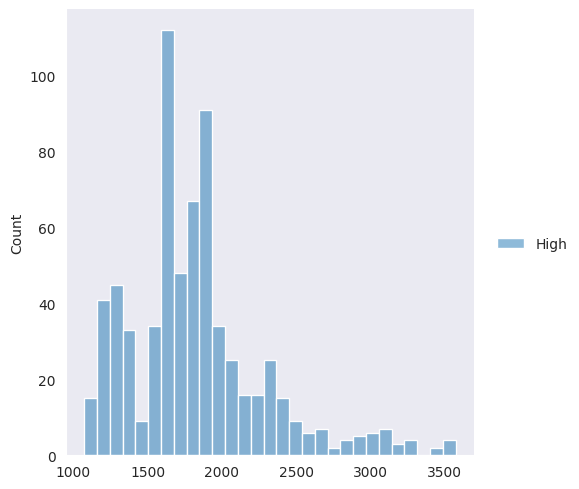

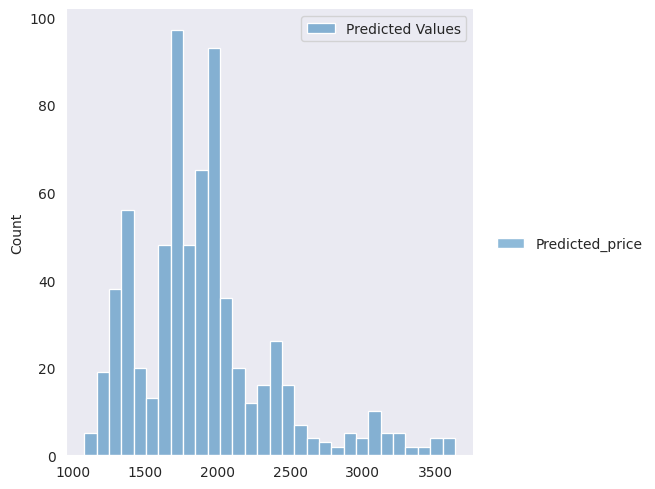

In [ ]:
# Plotting True against Predicted Values

# Getting the test data
pred_results_v2 = modelo_v2.evaluate(dados_teste_scaled)

# Converting true values to Pandas' format
Y = pred_results_v2.predictions.select('High').toPandas()

# Converting predicted values to Pandas' format
_Y = pred_results_v2.predictions.select("Predicted_price").toPandas()

# Plotting
sns.set_style("dark")
ax1 = sns.displot(Y, color = "r", label = "True Values")
sns.displot(_Y, color = "b", label = "Predicted Values")

plt.legend()

plt.show()

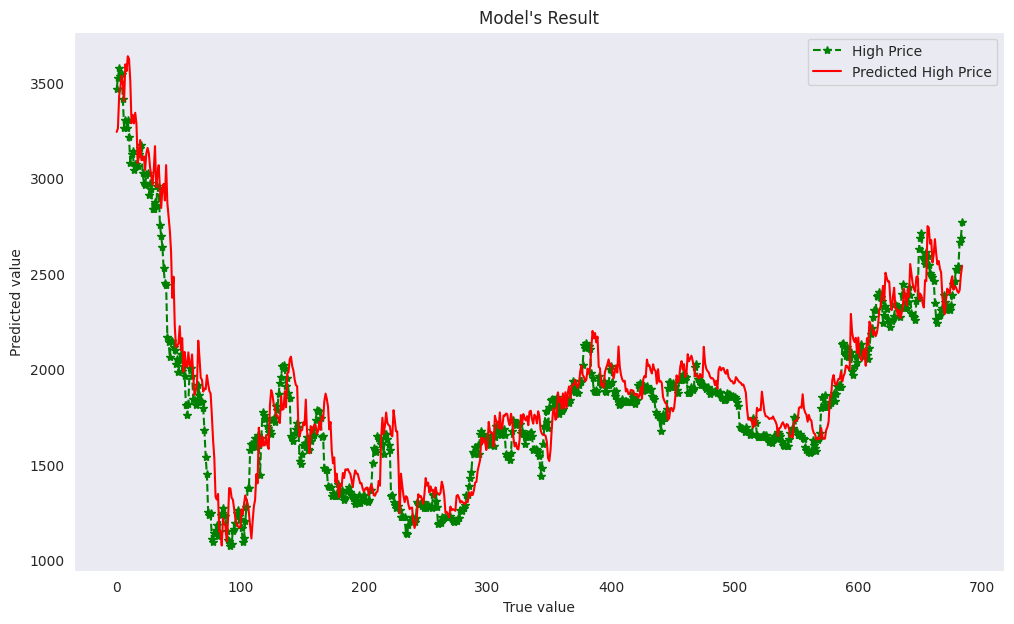

In [ ]:
# Plotting True values against Predicted values in a scatter plot
plt.figure(figsize = (12,7))
plt.plot(Y, color = 'green', marker = '*', linestyle = 'dashed', label = 'High Price')
plt.plot(_Y, color = 'red', label = 'Predicted High Price')
plt.title("Model's Result")
plt.xlabel('True value')
plt.ylabel('Predicted value')

plt.legend()

plt.show()

In [ ]:
# fitting a rather complex model to the data
# Let us use the GBTRegressor
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.regression import GBTRegressor

# Create a RandomForestRegressor instance
rf = GBTRegressor(featuresCol="scaled_features", labelCol="High",
                  predictionCol='Predicted High Price',maxDepth=3)

In [ ]:
# Training the model
modelo_v1 = rf.fit(dados_treino_scaled)

In [ ]:
# Predicting the test data
previsoes_v1 = modelo_v1.transform(dados_teste_scaled)
# Getting the respective columns
pred_data_v1 = previsoes_v1.select("Predicted High Price", "High").show(10)

+--------------------+-----------+
|Predicted High Price|       High|
+--------------------+-----------+
|   3517.845199633401|3467.555908|
|   3468.389822618311|3521.284668|
|  3517.9660327757483|3573.960205|
|  3567.4214097908384|3535.148193|
|  3567.4214097908384|3546.706787|
|  3567.4214097908384|3411.672119|
|  3458.0859092756095|3263.474609|
|   3417.395394371971|3301.607422|
|   3435.575892150053|3261.963135|
|   3417.395394371971|3303.003174|
+--------------------+-----------+
only showing top 10 rows



In [ ]:
# Creating an evaluator for the regression model
evaluator = RegressionEvaluator(labelCol = "High",
                                predictionCol = "Predicted High Price",
                                metricName = "rmse")
# Applying the Evaluator
rmse_v1 = evaluator.evaluate(previsoes_v1)
print("Root Mean Squared Error (RMSE) nos dados de teste = %g" % rmse_v1)

Root Mean Squared Error (RMSE) nos dados de teste = 315.875


In [ ]:
# Creating an evaluator for the regression model
evaluator = RegressionEvaluator(labelCol = "High",
                                predictionCol = "Predicted High Price",
                                metricName = "r2")
# Applying the Evaluator
r2_v1 = evaluator.evaluate(previsoes_v1)
print("Root Mean Squared Error (RMSE) nos dados de teste = %g" % r2_v1)

Root Mean Squared Error (RMSE) nos dados de teste = 0.53025


In [ ]:
# Converting true values to Pandas' format
Y = previsoes_v1.select('High').toPandas()
# Converting predicted values to Pandas' format
_Y = previsoes_v1.select("Predicted High Price").toPandas()

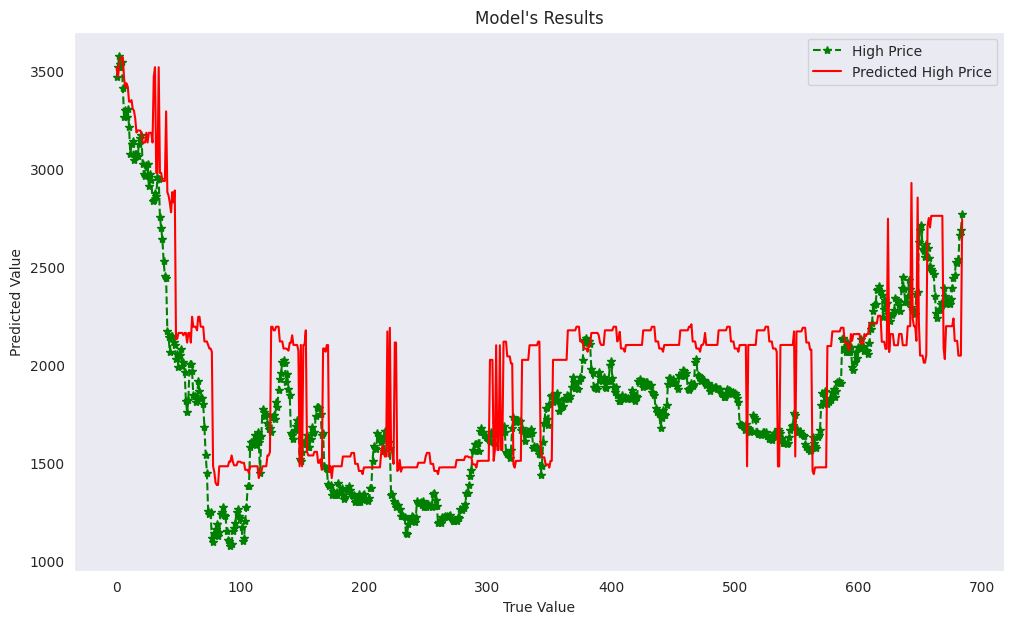

In [ ]:
# Plotting true against predicted values
plt.figure(figsize = (12,7))
plt.plot(Y, color = 'green', marker = '*', linestyle = 'dashed', label = 'High Price')
plt.plot(_Y, color = 'red', label = 'Predicted High Price')
plt.title("Model's Results")
plt.xlabel('True Value')
plt.ylabel('Predicted Value')

plt.legend()

plt.show()

In [ ]:
# Encerra a sessão Spark
spark_session.stop()